In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(threshold=np.inf)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


import scipy as sp
np.set_printoptions(threshold=np.inf)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
# # 读取数据
# dataset= pd.read_excel('data6041.xlsx', sheet_name='Sheet1')
# X = dataset.iloc[:, 1:4]
# y = dataset.iloc[:,4]




In [3]:
# #分测试集和训练集
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# # 特征归一化
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)



In [4]:
# df=dataset.iloc[:,1:5]
# df_train,df_test=train_test_split(df,test_size = 0.2, random_state = 0)
# df_train.to_csv("d://xunlian.csv")
# df_test.to_csv("d://ceshi.csv")

In [2]:

print("开始读入训练数据...")
df = pd.read_excel('../data/train6041.xlsx', sheet_name='Sheet1')


esc = StandardScaler().fit(df['Fluid resistivity logging'].values.reshape(-1, 1))
fsc = StandardScaler().fit(df['natural gamma-ray logging'].values.reshape(-1, 1))
gsc = StandardScaler().fit(df['spontaneous potential logging'].values.reshape(-1, 1))




e = esc.transform(df['Fluid resistivity logging'].values.reshape(-1, 1))
f = fsc.transform(df['natural gamma-ray logging'].values.reshape(-1, 1))
g = gsc.transform(df['spontaneous potential logging'].values.reshape(-1, 1))



X_train = np.concatenate(( e,f,g), axis=1)
y_train = np.array(df['rock'])



开始读入训练数据...


In [6]:
#生成分类器并训练
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier( random_state=0)



In [7]:
# #应用k次交叉验证评价模型性能
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# #accuracies.std() 
# #这意味着我们的准确度在（90-100）%之间

In [8]:
#应用网格搜索寻找最佳模型和最佳参数
from sklearn.model_selection import GridSearchCV #对SVC进行检查，网格搜索优化参数。
parameters = [{'n_estimators' : [10,20,30,40,50,60,70,80,90],'max_depth' : [5,10,15,20],'min_samples_split':[5,10,15,20,25,30]}] 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv =10,
                           n_jobs = -1)

In [9]:
#将网格搜索对象拟合到训练集
# grid_search = grid_search.fit(X_train, y_train)

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


21.5401281


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [10]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_






In [11]:
print('%.5f' %best_accuracy)
print(best_parameters)


0.80738
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 70}


In [12]:
parameters = [{'n_estimators' : [30,50,70,90,110,130,150,170],'max_depth' : np.linspace (10, 40, 6),'min_samples_split' : [3,5,7,9,11,13,15]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [13]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


61.20564060000001


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [14]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数
best_parameters = grid_search.best_params_

In [15]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.80882
{'max_depth': 22.0, 'min_samples_split': 9, 'n_estimators': 90}


In [16]:
parameters = [{'n_estimators' : [30,50,70,90,110,130,150,170],'max_depth' :[22],'min_samples_split' : [9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [17]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


2.327724400000008


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [18]:
k1 = [30,50,70,90,110,130,150,170]
for x1 in k1:
    classifier= RandomForestClassifier(n_estimators=x1,max_depth =22,min_samples_split= 9, random_state=0)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


0.80555
0.80503
0.80691
0.80883
0.80449
0.80551
0.80599
0.80552


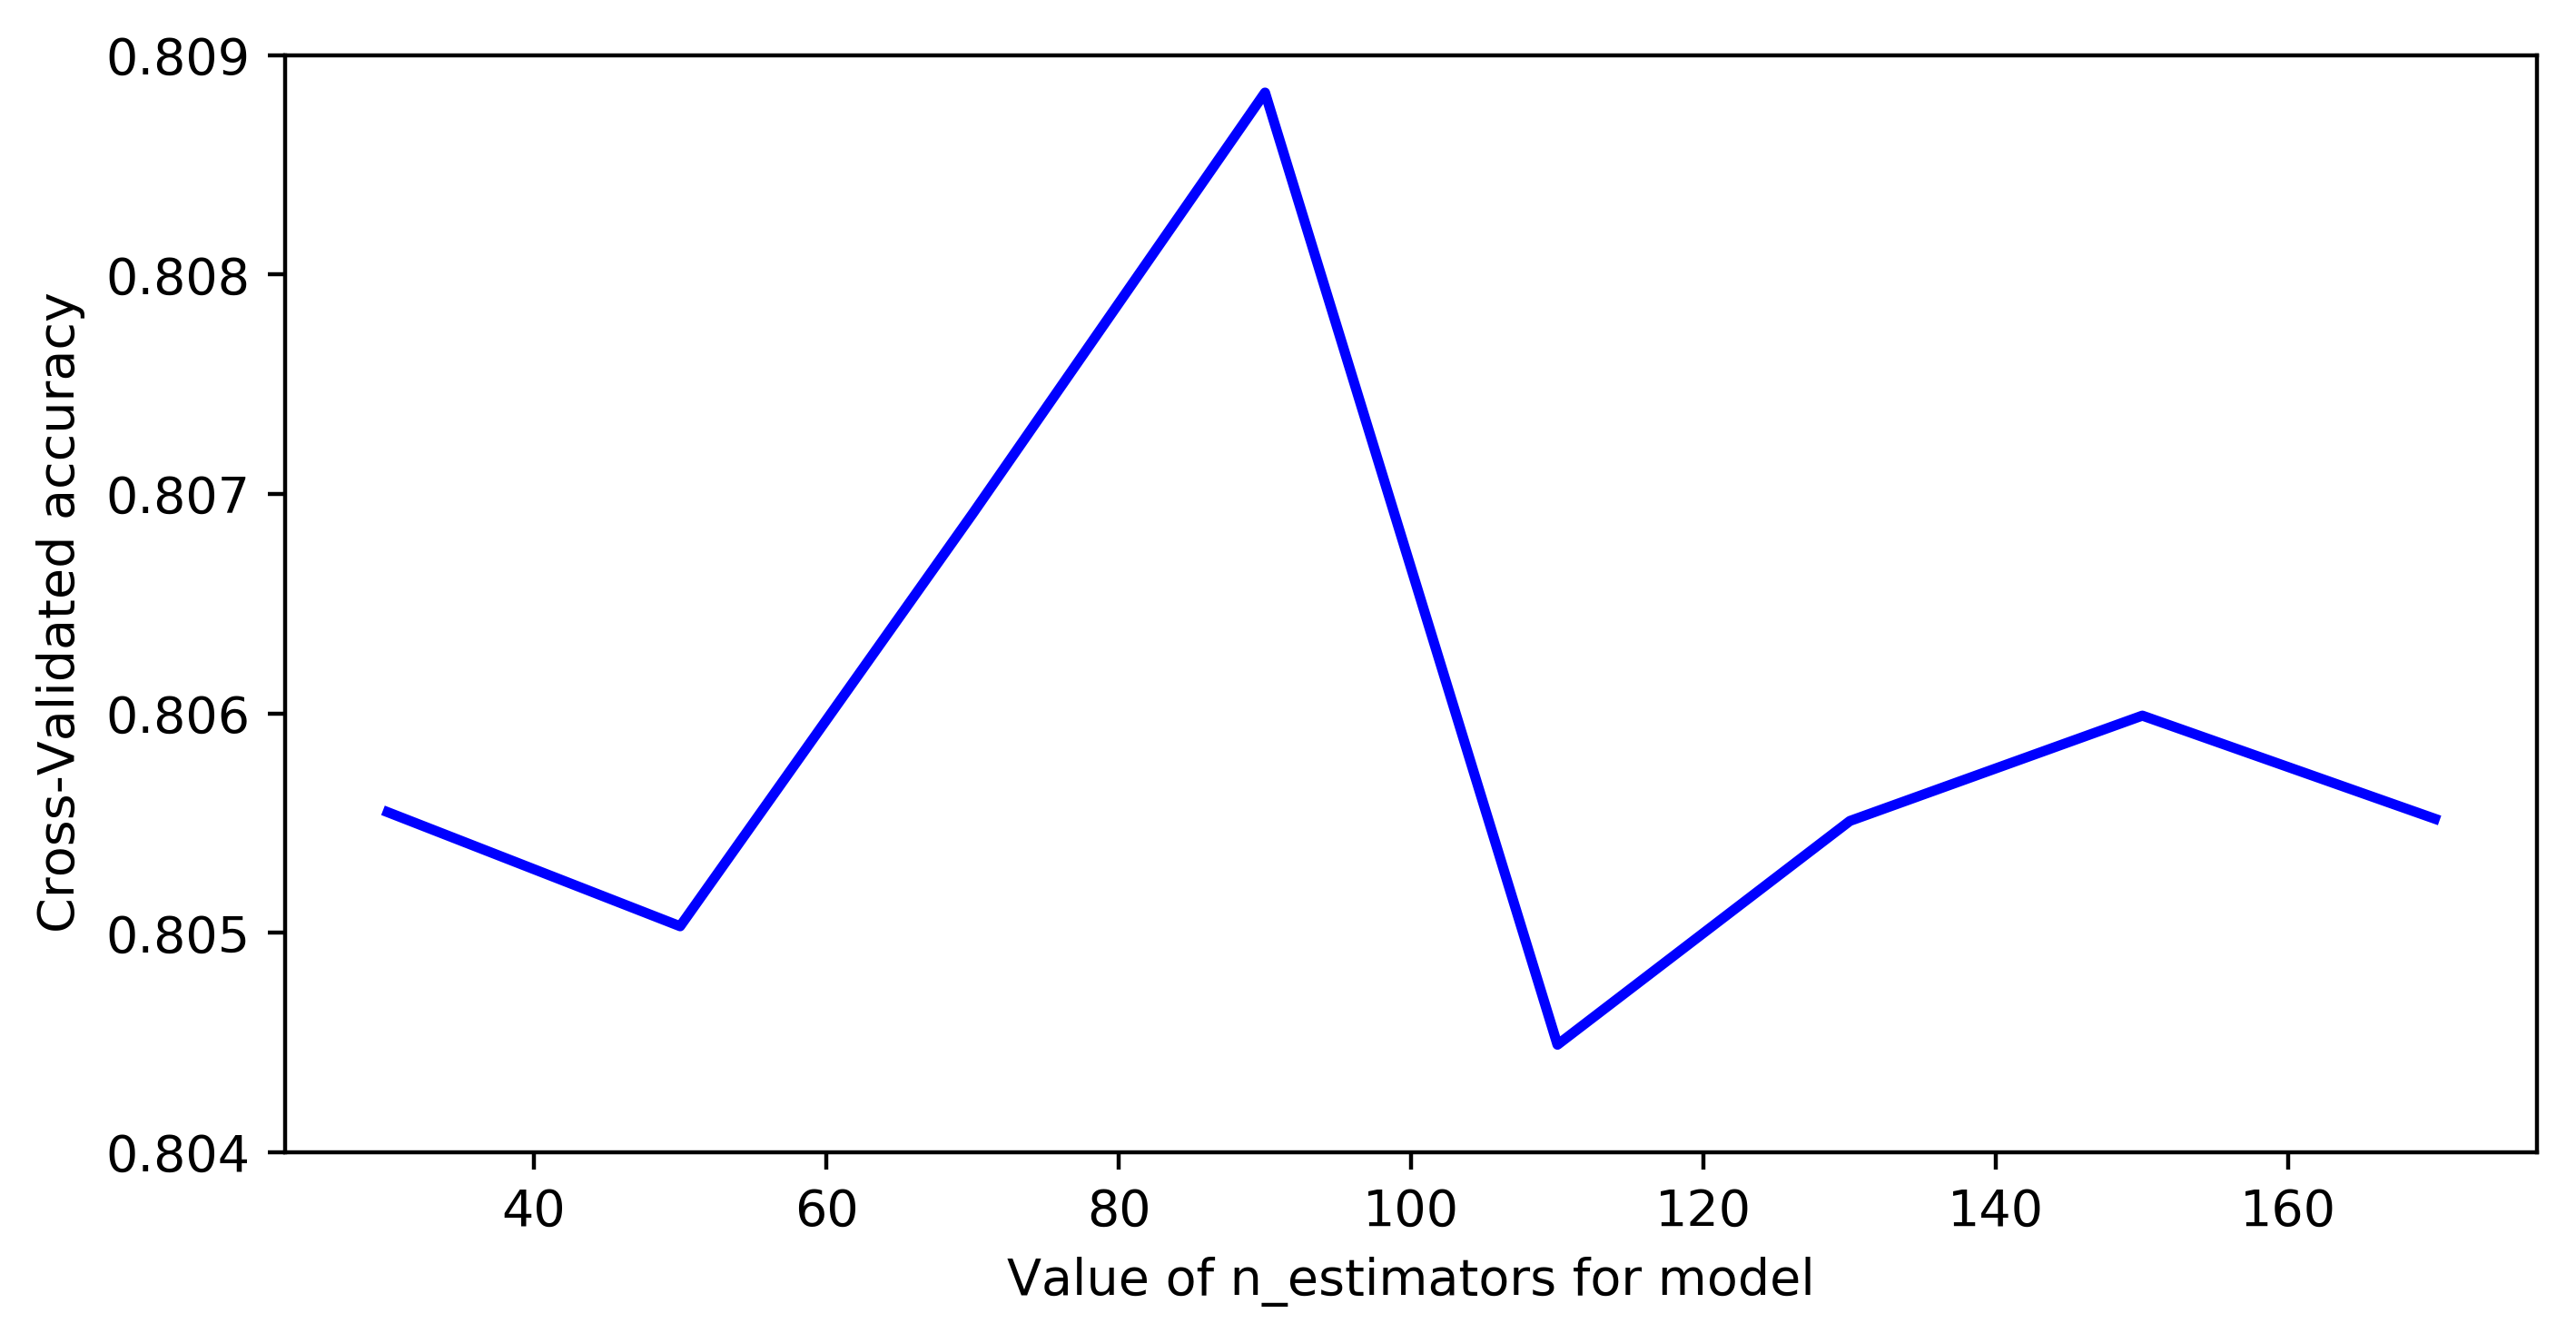

In [19]:
x = [30,50,70,90,110,130,150,170]
y=[0.80555,0.80503,0.80691,0.80883,0.80449,0.80551,0.80599,0.80552]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of n_estimators for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.804,0.809)
plt.show
plt.savefig('../Data/RF_accuracy_1.png', format='png')

In [20]:
parameters = [{'n_estimators' : [90],'max_depth' : np.linspace (10, 40, 6),'min_samples_split' : [9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [21]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


1.3540404000000024


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [22]:
k2 = [10,16,22,28,34,40]
for x2 in k2:
    classifier= RandomForestClassifier(n_estimators=90,max_depth =x2,min_samples_split= 9, random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.79641
0.80500
0.80883
0.80883
0.80883
0.80883


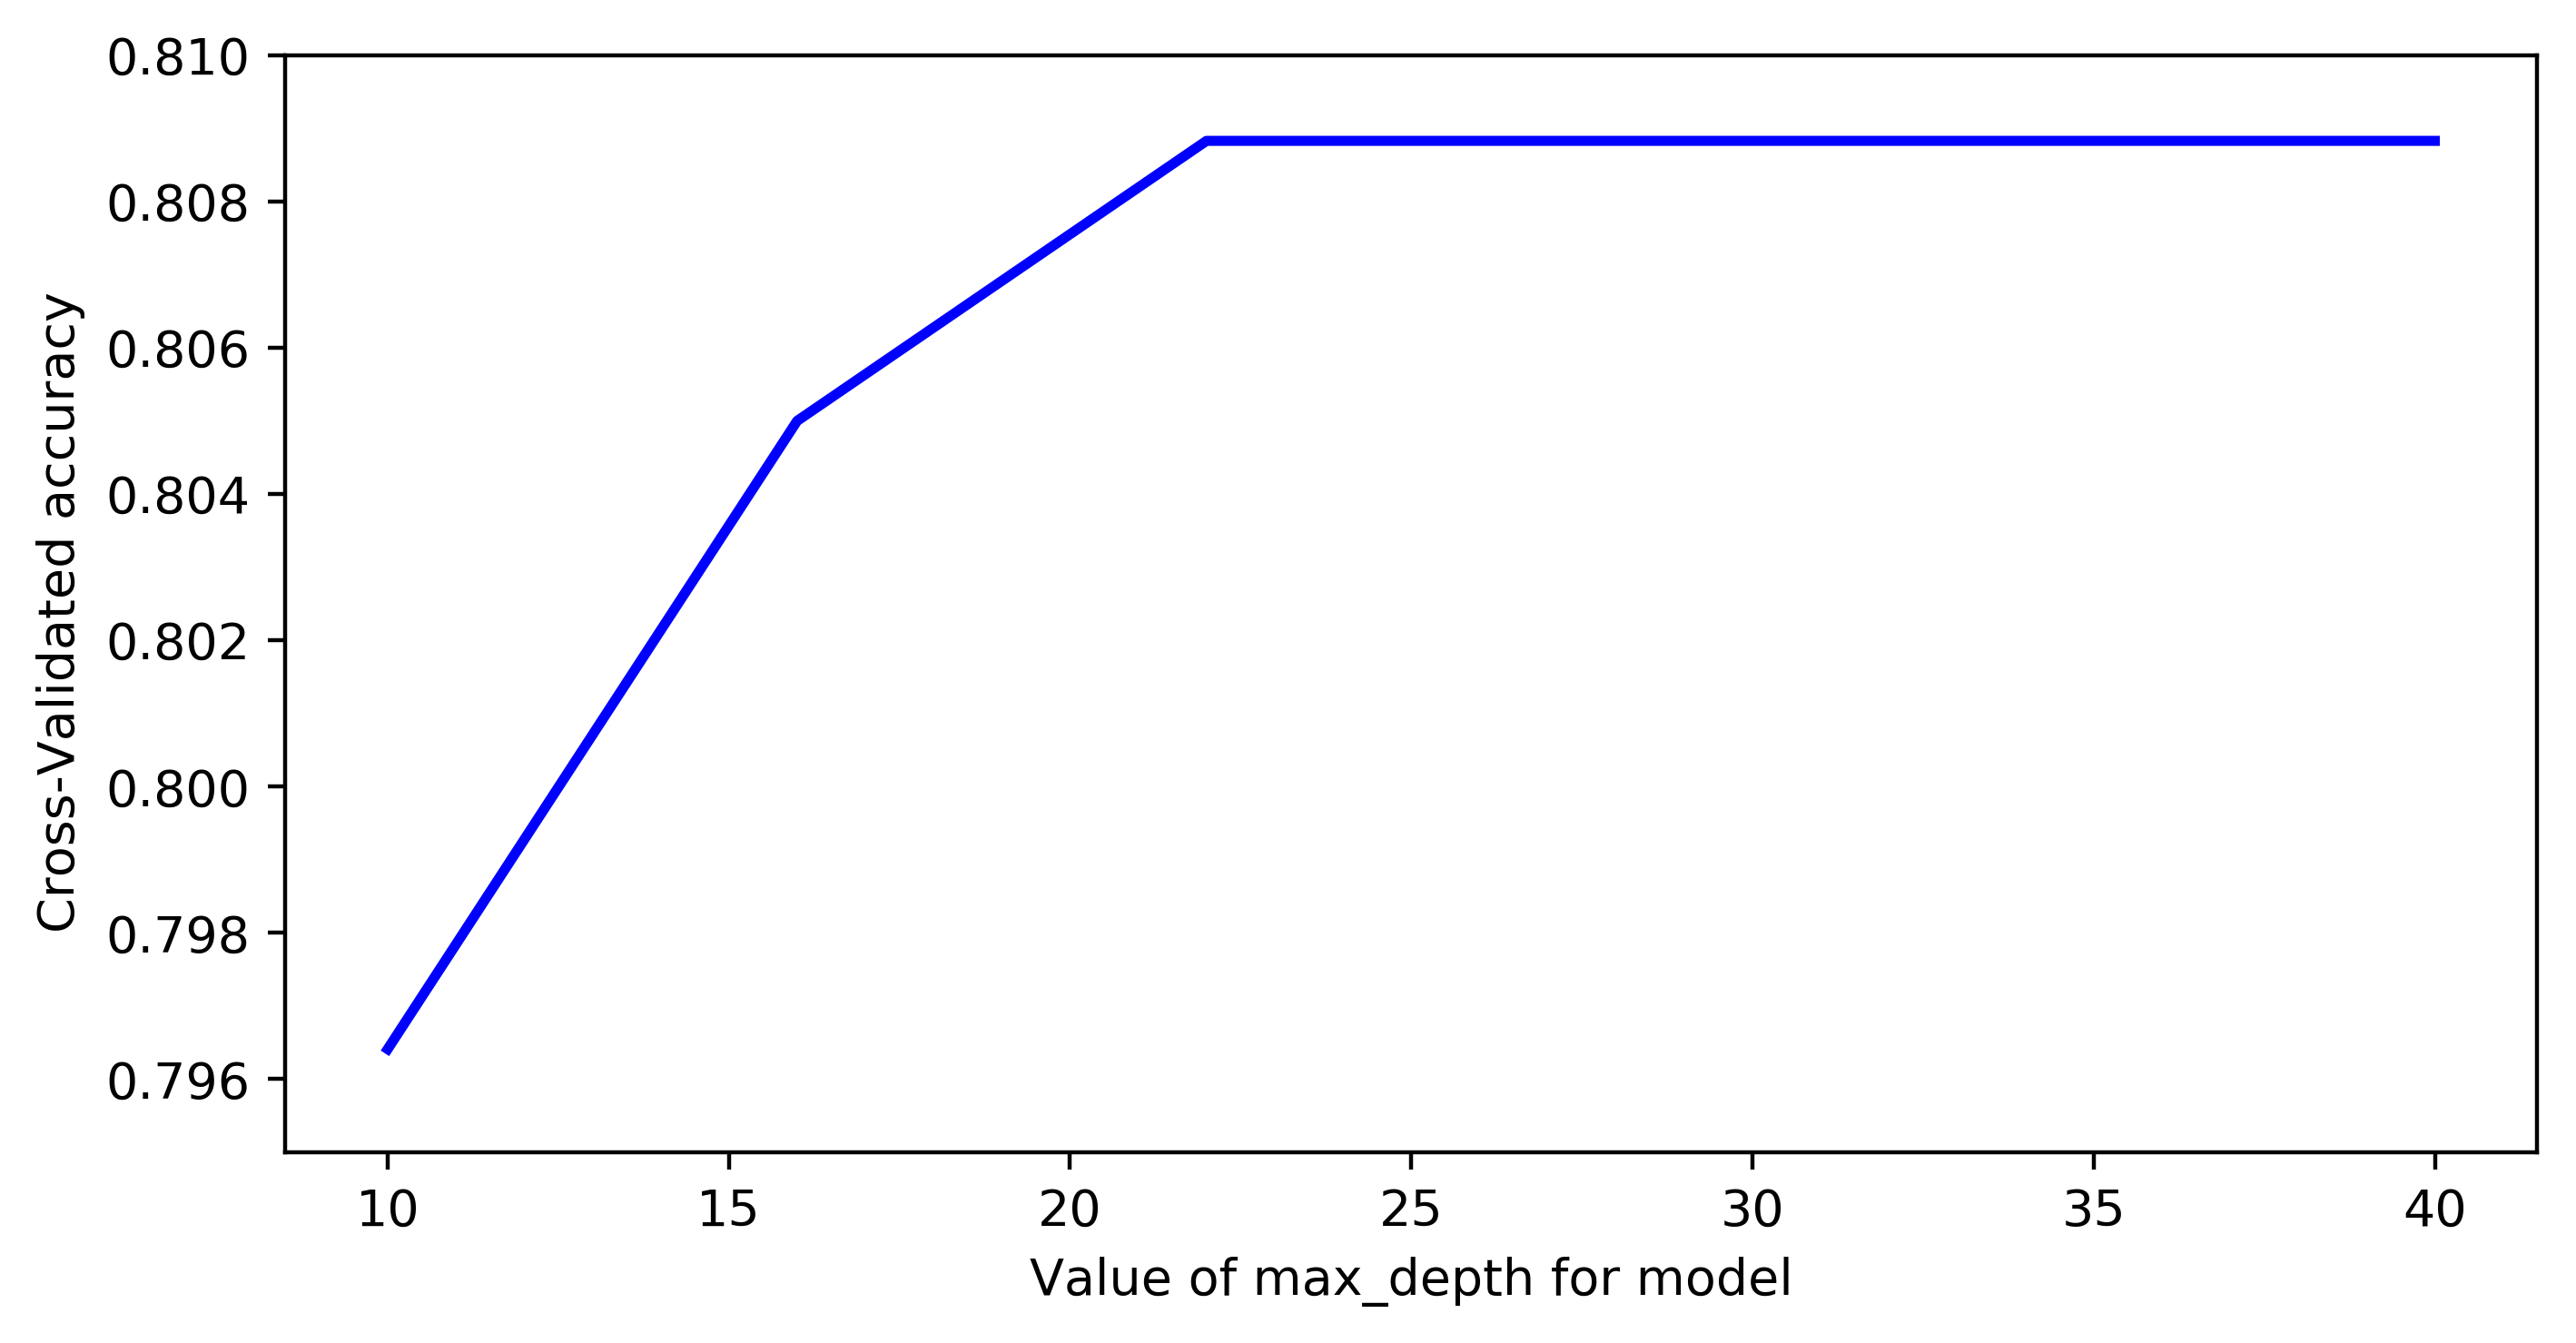

In [23]:
x = [10,16,22,28,34,40]
y=[0.79641,0.80500,0.80883,0.80883,0.80883,0.80883]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of max_depth for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.795,0.81)
plt.show
plt.savefig('../Data/RF_accuracy_2.png', format='png')

In [24]:
parameters = [{'n_estimators' : [90],'max_depth' : [22],'min_samples_split' : [3,5,7,9,11,13,15]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [25]:

import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


1.3661110999999835


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [26]:
k3 = [3,5,7,9,11,13,15]
for x3 in k3:
    classifier= RandomForestClassifier(n_estimators=90,max_depth =22,min_samples_split= x3, random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.80410
0.80550
0.80661
0.80883
0.80495
0.80317
0.79983


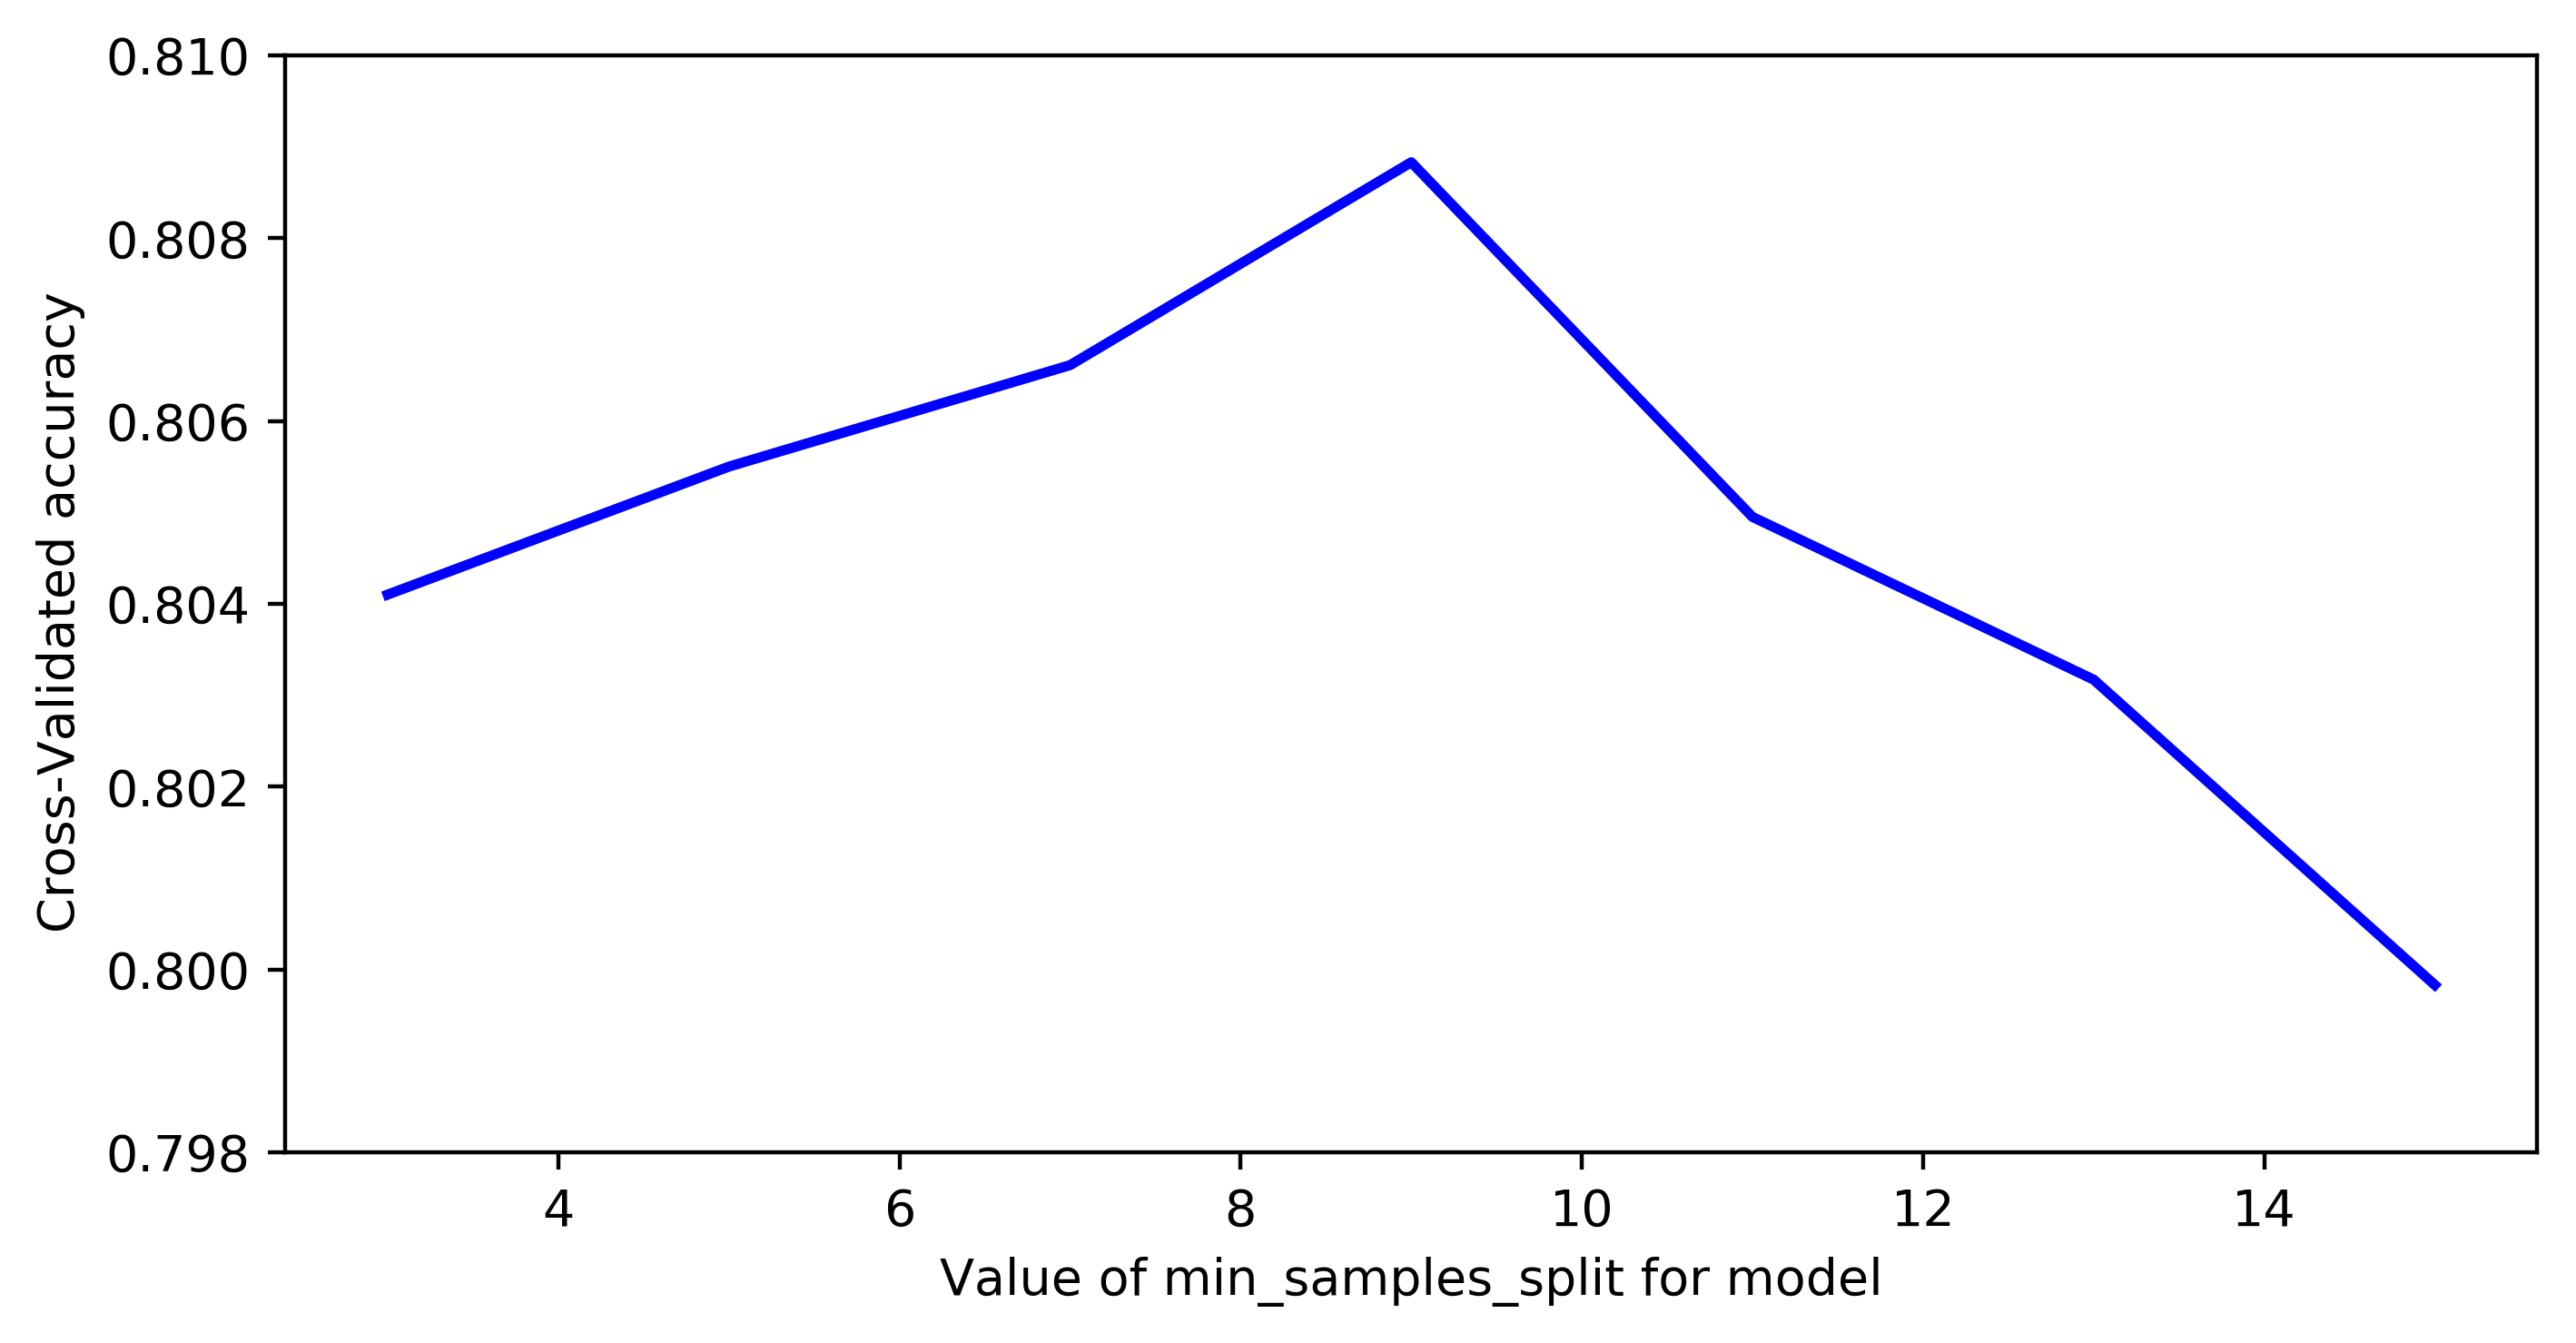

In [27]:
x = [3,5,7,9,11,13,15]
y=[0.80410,0.80550,0.80661,0.80883,0.80495,0.80317,0.79983]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of min_samples_split for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.798,0.81)
plt.show
plt.savefig('../Data/RF_accuracy_3.png', format='png')

In [28]:
parameters = [{'n_estimators' : [70,80,90,100,110,120],'max_depth' : np.linspace (20, 30, 6),'min_samples_split' : [7,8,9,10,11,12]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [29]:
# grid_search = grid_search.fit(X_train, y_train)
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until


36.84749740000001


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [30]:
#最优精度
best_accuracy = grid_search.best_score_
#最优参数。
best_parameters = grid_search.best_params_



In [31]:
print('%.5f' %best_accuracy)
print(best_parameters)

0.80930
{'max_depth': 24.0, 'min_samples_split': 8, 'n_estimators': 80}


In [32]:
parameters = [{'n_estimators' : [70,80,90,100,110,120],'max_depth' :[24],'min_samples_split' : [8]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)


In [33]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.4078143000000125


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [34]:
k4 = [70,80,90,100,110,120]
for x4 in k4:
    classifier= RandomForestClassifier(n_estimators=x4,max_depth =24,min_samples_split= 8, random_state=0)
    classifier.fit(X_train, y_train,)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 )
   

    print('%.5f' % accuracies.mean())


0.80748
0.80935
0.80504
0.80604
0.80557
0.80508


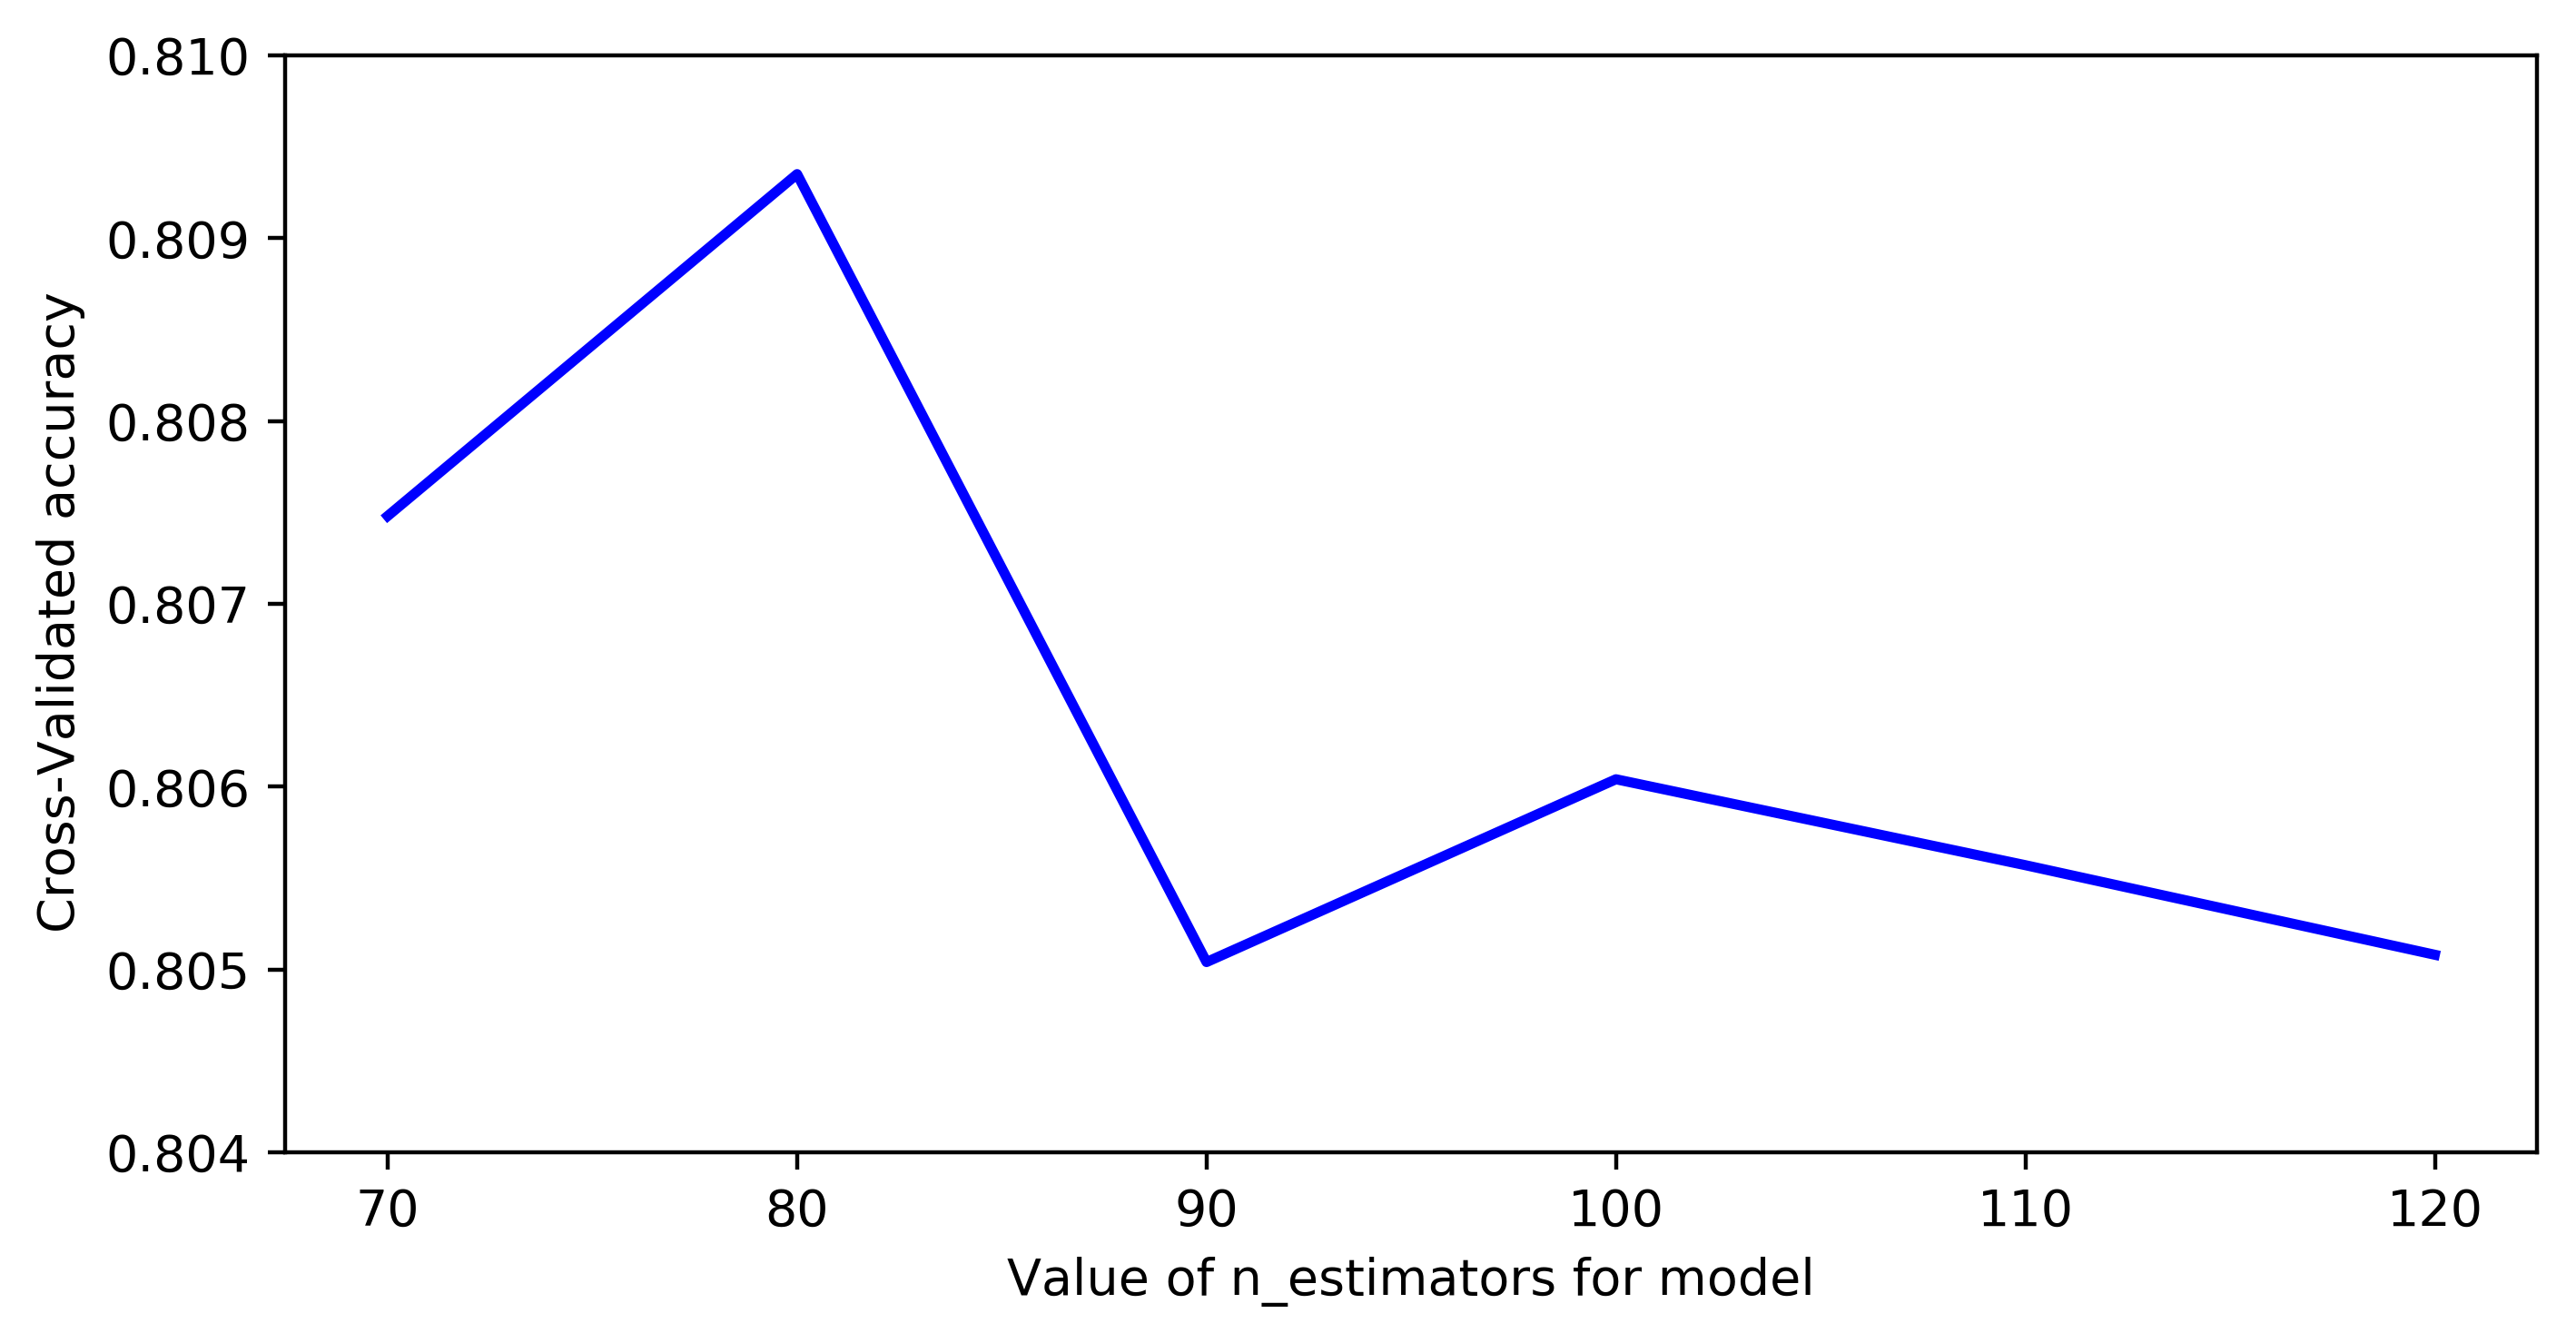

In [35]:
x = [70,80,90,100,110,120]
y=[0.80748,0.80935,0.80504,0.80604,0.80557,0.80508]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of n_estimators for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.804,0.81)
plt.show
plt.savefig('../Data/RF_accuracy_4.png', format='png')

In [36]:
parameters = [{'n_estimators' : [80],'max_depth' : np.linspace(20,30,6),'min_samples_split' : [8]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [37]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.2133542999999918


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [38]:
k5 = [20,22,24,26,28,30]
for x5 in k5:
    classifier= RandomForestClassifier(n_estimators=80,max_depth =x5,min_samples_split= 8, random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.80888
0.80888
0.80935
0.80935
0.80935
0.80935


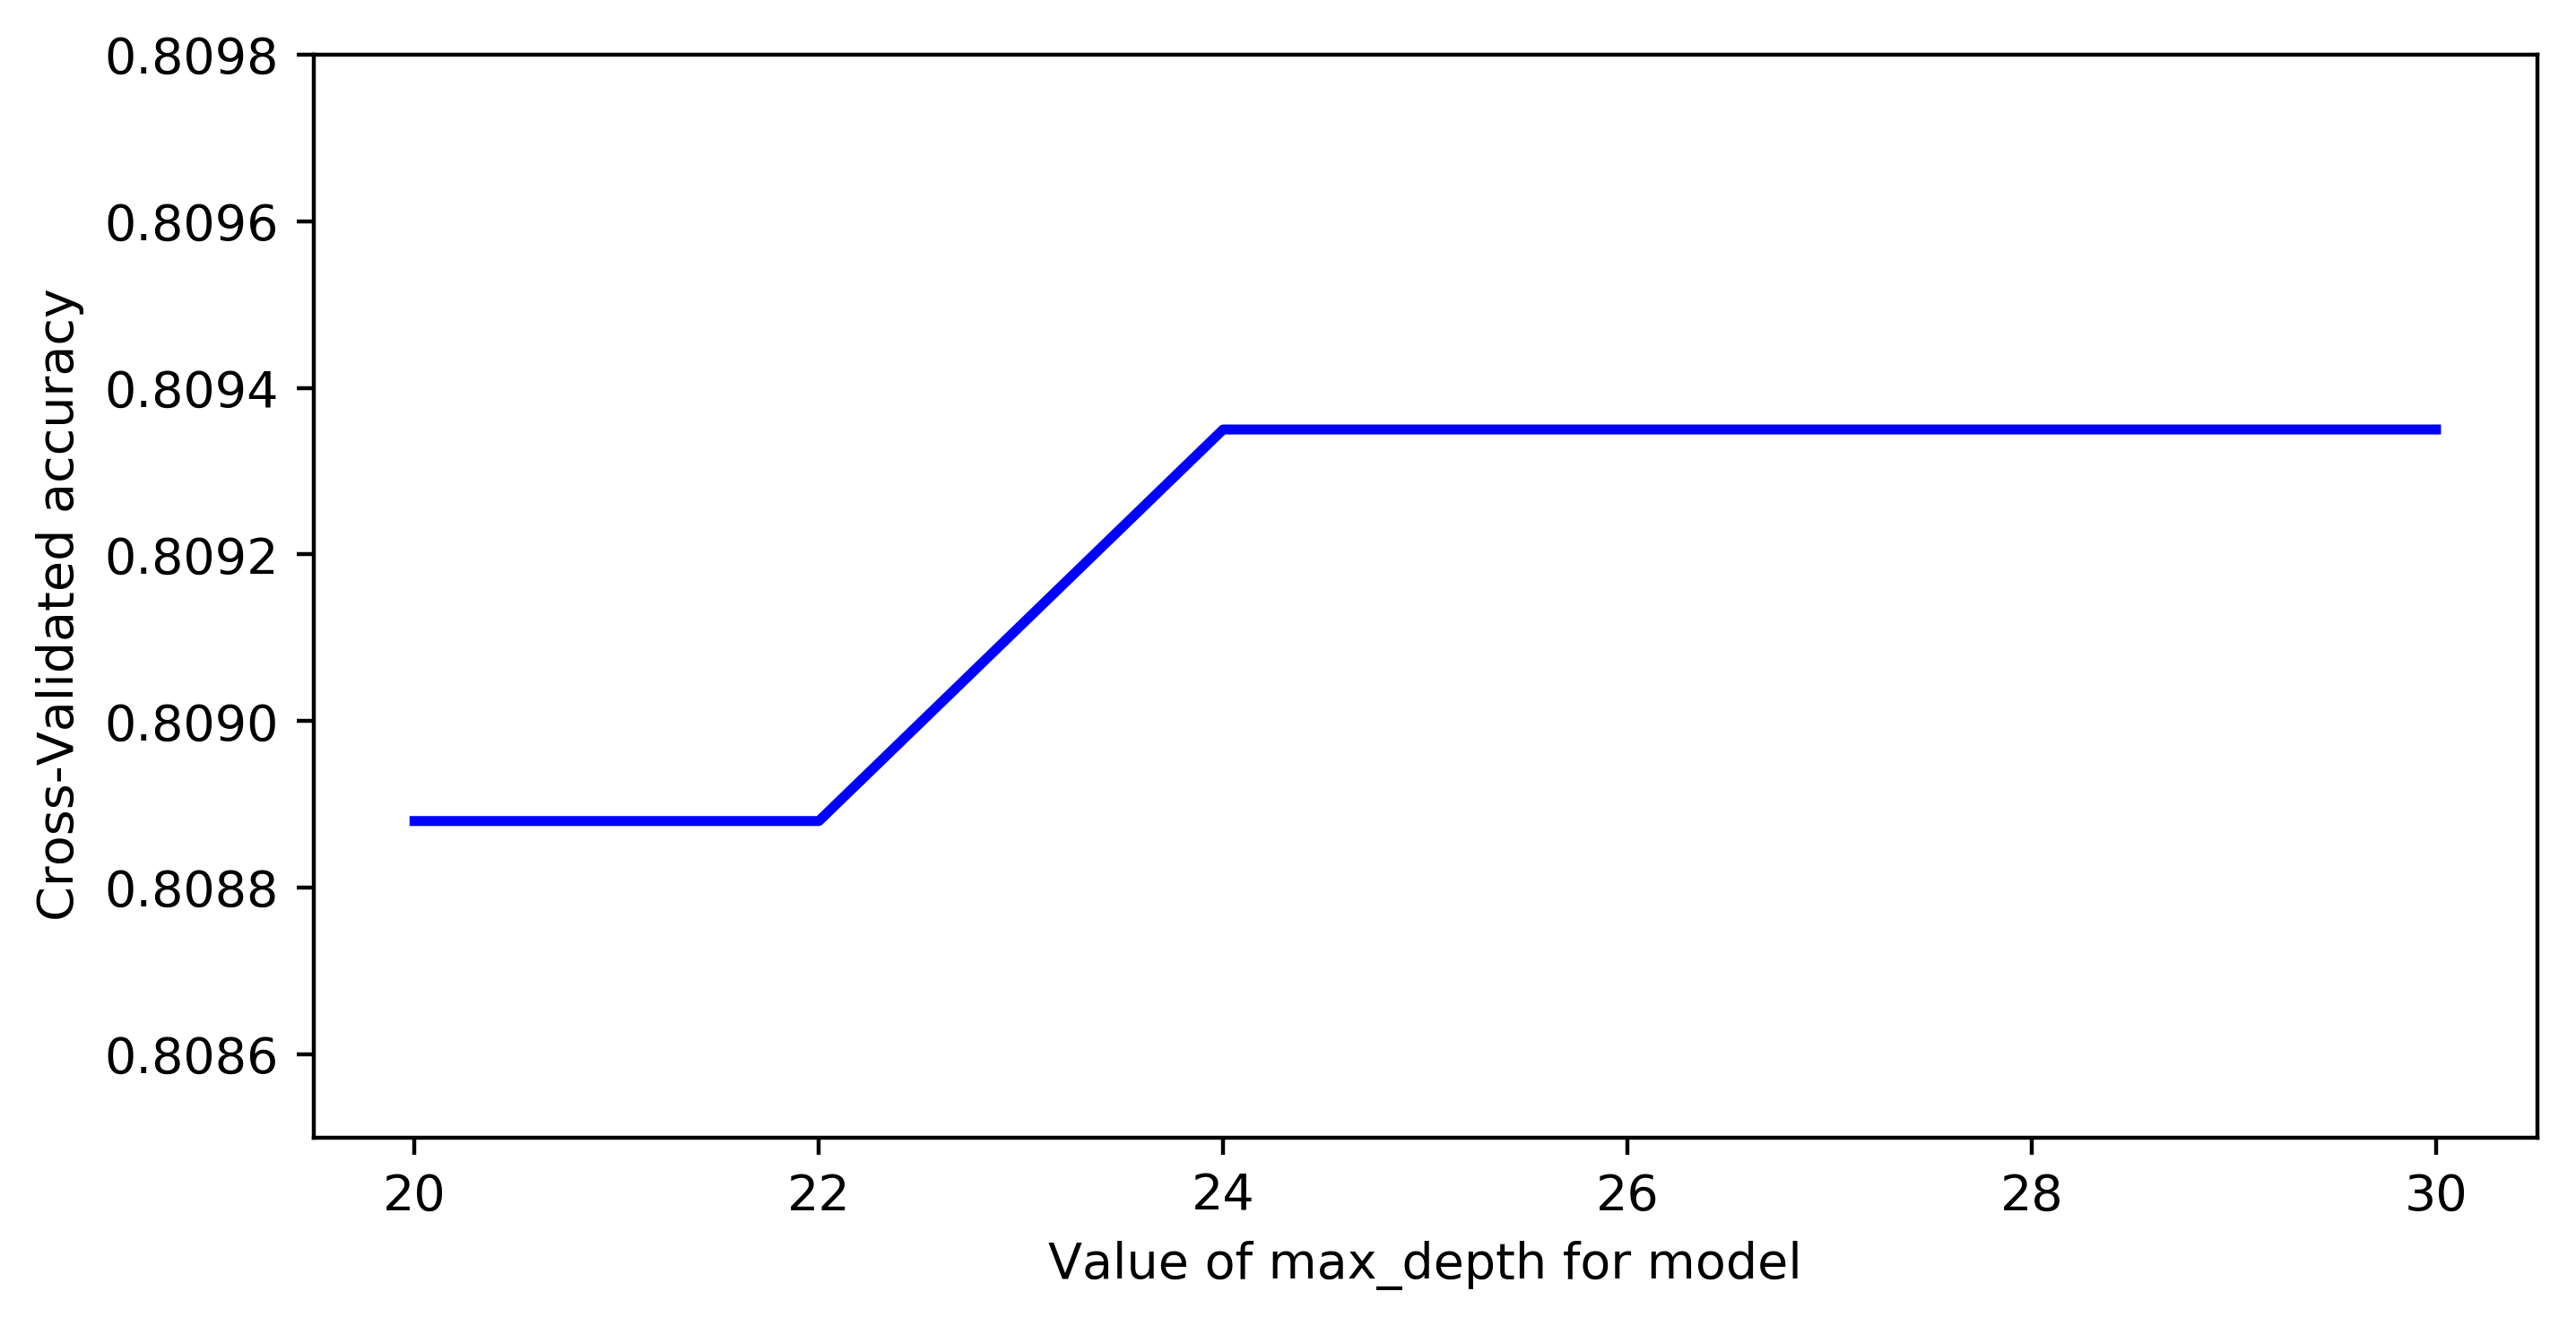

In [39]:
x = [20,22,24,26,28,30]
y=[0.80888,0.80888,0.80935,0.80935,0.80935,0.80935]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of max_depth for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.8085,0.8098)
plt.show
plt.savefig('../Data/RF_accuracy_5.png', format='png')

In [40]:
parameters = [{'n_estimators' : [80],'max_depth' : [24],'min_samples_split' : [7,8,9,10,11,12]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [41]:
import time
start = time.clock()
grid_search = grid_search.fit(X_train, y_train)
end = time.clock()
print (end-start)

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


1.1299491999999987


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [42]:
k6 = [7,8,9,10,11,12]
for x6 in k6:
    classifier= RandomForestClassifier(n_estimators=80,max_depth =24,min_samples_split= x6, random_state=0)
    classifier.fit(X_train, y_train)
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train , cv = 10)
    print('%.5f' % accuracies.mean())

0.80125
0.80935
0.80593
0.80505
0.79871
0.79833


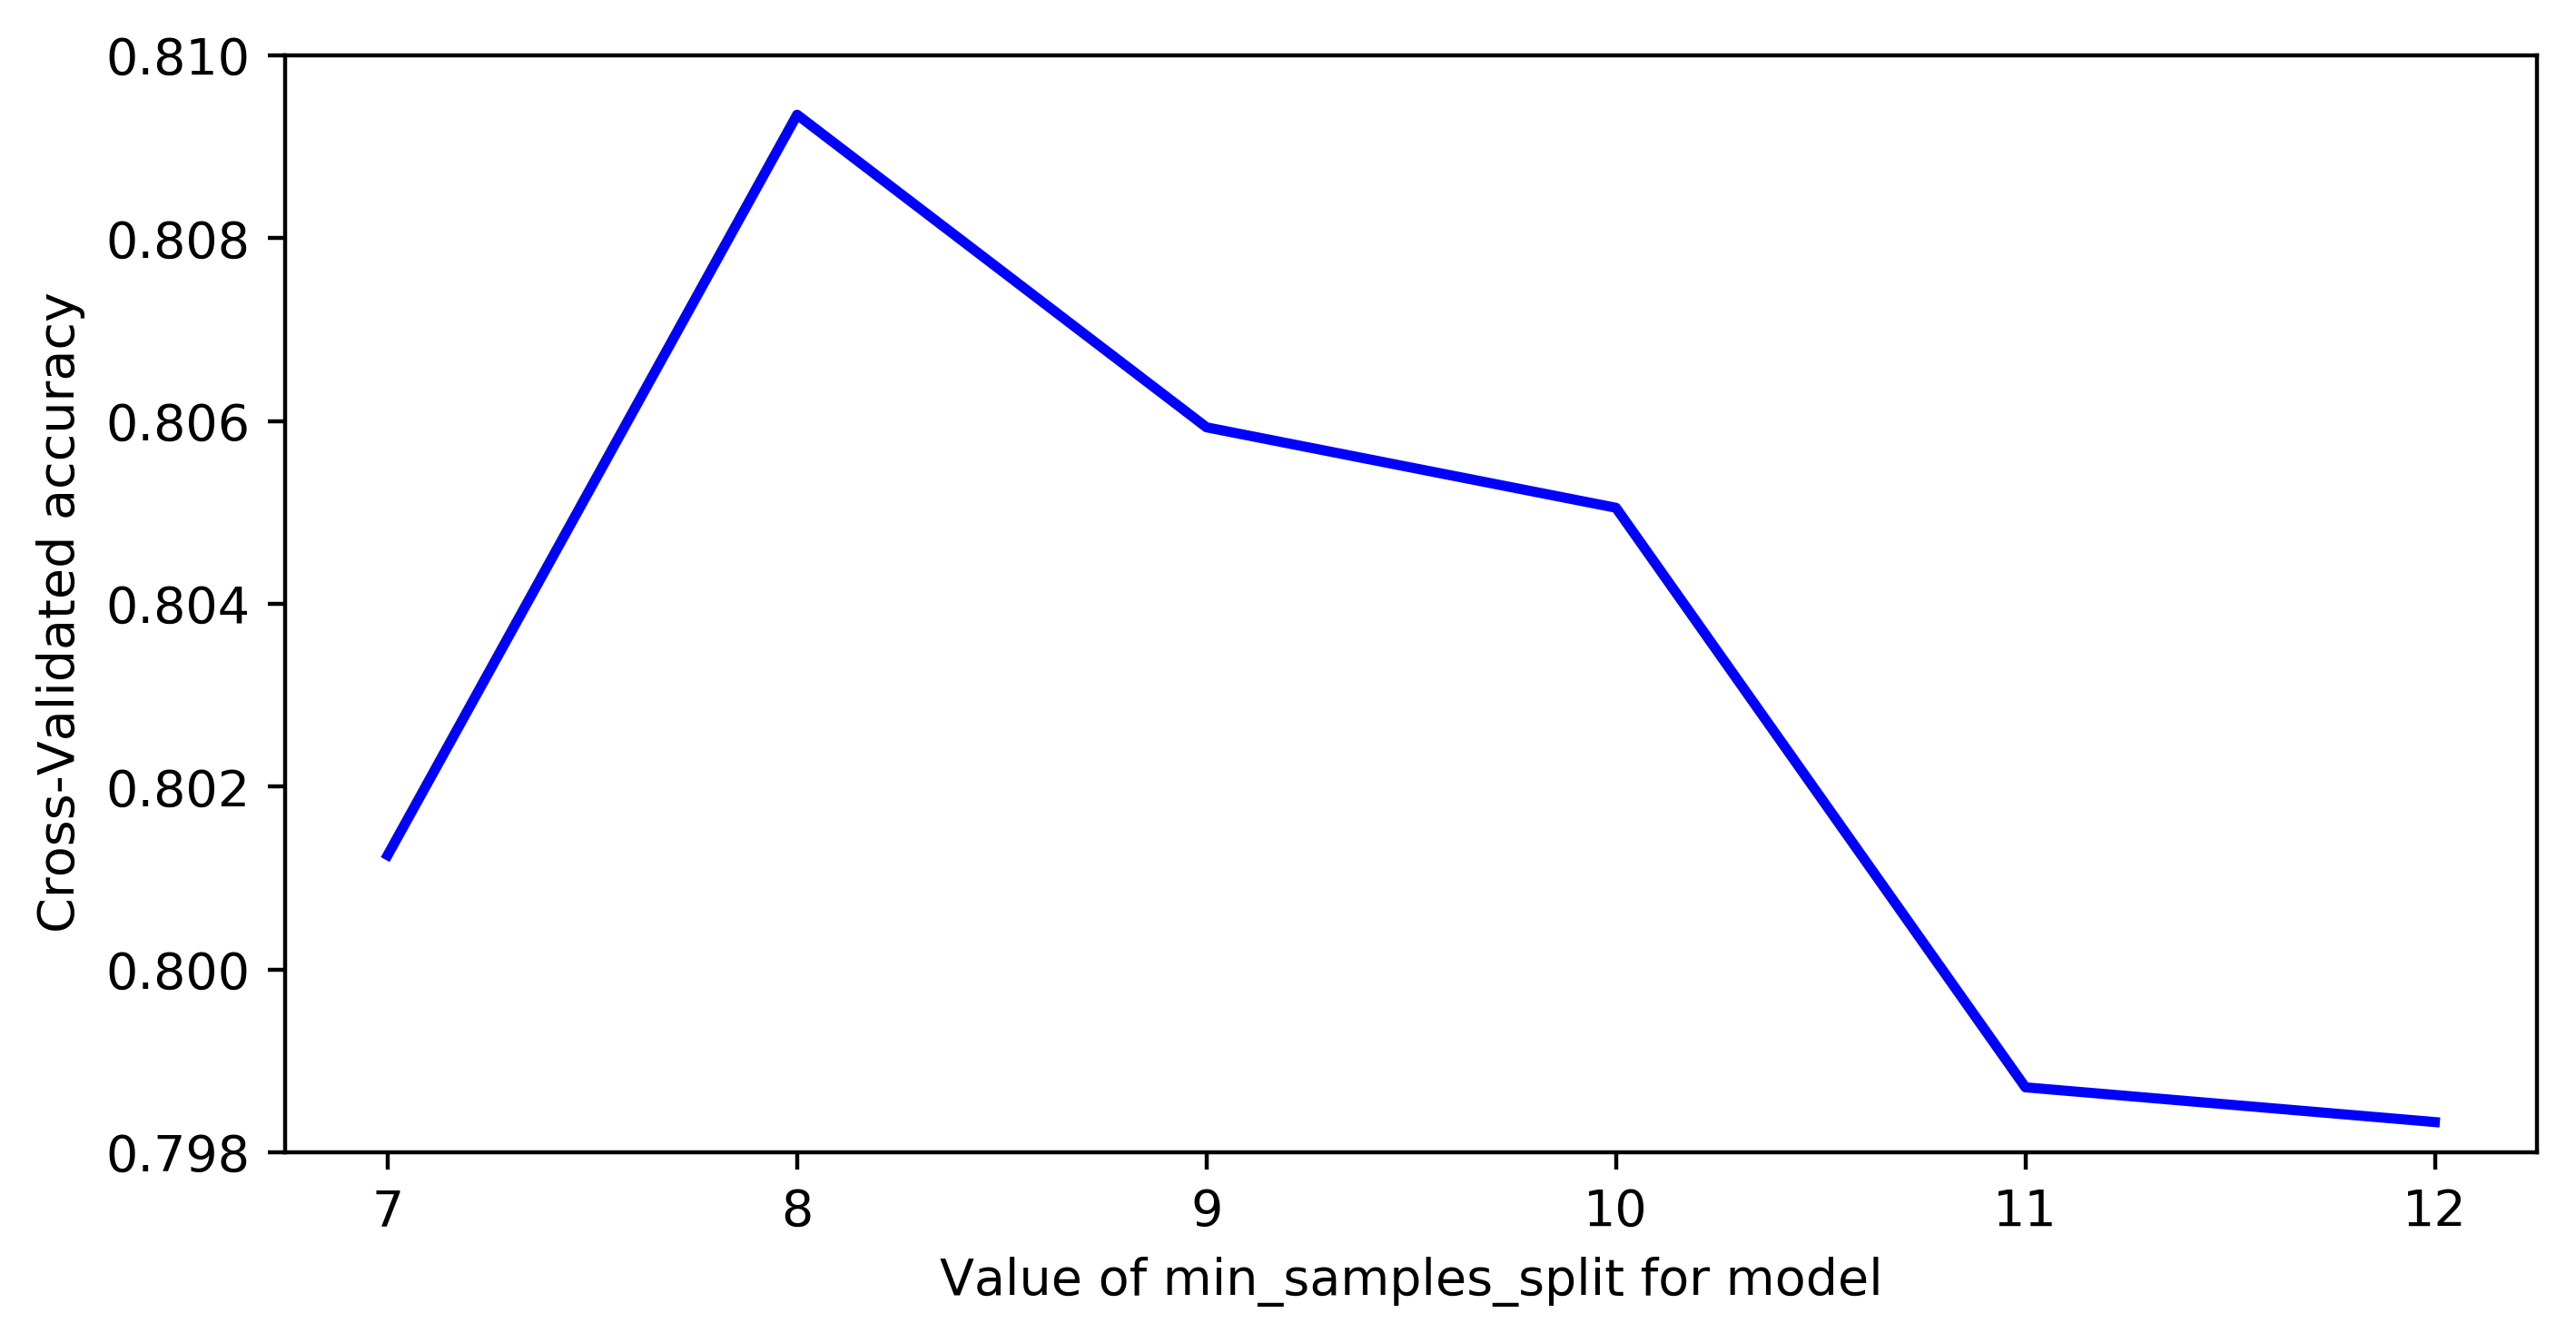

In [43]:
x = [7,8,9,10,11,12]
y=[0.80125,0.80935,0.80593,0.80505,0.79871,0.79833]
plt.figure(figsize=(8,4),dpi=400)
plt.plot(x,y,color='blue',linewidth=2)
plt.xlabel('Value of min_samples_split for model')
plt.ylabel('Cross-Validated accuracy ')
# plt.title('SVM')
plt.ylim(0.798,0.81)
plt.show
plt.savefig('../Data/RF_accuracy_6.png', format='png')

In [3]:

from sklearn.model_selection import cross_val_score
classifier= RandomForestClassifier(max_depth=24, min_samples_split=8, n_estimators=80)
classifier.fit(X_train, y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train,cv=10 )
# print('训练集精度为：')

# print('%.5f' %accuracies.mean())




In [4]:
print("正在保存训练数据结果至文件中...")
y_train_pred= classifier.predict(X_train)
y_train_pred = pd.DataFrame({'RF_train_pred': y_train_pred})
Df = pd.concat([df, y_train_pred ], axis=1)
writer = pd.ExcelWriter('../data/train6041.xlsx', engine='xlsxwriter')

Df.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")

print('训练集精度为：')

accuracy_score(y_train,y_train_pred)


正在保存训练数据结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
训练集精度为：


0.9108768567321515

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred,digits=5))

              precision    recall  f1-score   support

           1    1.00000   0.95522   0.97710        67
           2    0.95876   0.66429   0.78481       140
           3    0.91328   0.99522   0.95249       836
           4    0.92527   0.92325   0.92426       456
           5    1.00000   0.41667   0.58824        24
           6    0.86096   0.90960   0.88462       177
           7    0.86598   0.77778   0.81951       108
           8    0.89524   0.78992   0.83929       119
           9    0.90769   0.95161   0.92913        62
          10    0.86458   0.84694   0.85567        98

    accuracy                        0.91088      2087
   macro avg    0.91918   0.82305   0.85551      2087
weighted avg    0.91237   0.91088   0.90734      2087



In [46]:
print("开始读入测试数据...")
testDf = pd.read_excel('../data/test6041.xlsx', sheet_name='Sheet1')


# ttc = csc.transform(testDf[' temperature logging'].values.reshape(-1, 1))
# ttd = dsc.transform(testDf['Vertical Component Logging '].values.reshape(-1, 1))
tte = esc.transform(testDf['Fluid resistivity logging'].values.reshape(-1, 1))
ttf = fsc.transform(testDf['natural gamma-ray logging'].values.reshape(-1, 1))
ttg = gsc.transform(testDf['spontaneous potential logging'].values.reshape(-1, 1))


X_test = np.concatenate((tte,ttf,ttg), axis=1)

y_test = np.array(testDf['rock'])

开始读入测试数据...


In [47]:
classifier.fit(X_test, y_test)
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test,cv=10)
# print('测试集精度为：')

# print('%.5f' %accuracies.mean())

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [48]:
# y_test_pred = classifier.predict(X_test)
y_test_pred= classifier.predict(X_test)
print("正在保存测试结果至文件中...")
y_test_pred = pd.DataFrame({'RF_test_pred':y_test_pred })
wDf = pd.concat([testDf, y_test_pred ], axis=1)
writer = pd.ExcelWriter('../data/test6041.xlsx', engine='xlsxwriter')

wDf.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()
print("处理完毕，已保存至文件！")
input("Please press <enter>")
print('测试集精度为：')

accuracy_score(y_test,y_test_pred)

正在保存测试结果至文件中...
处理完毕，已保存至文件！
Please press <enter>
测试集精度为：


0.89272030651341

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred,digits=5))



              precision    recall  f1-score   support

           1    1.00000   0.93750   0.96774        16
           2    0.94118   0.48485   0.64000        33
           3    0.89177   0.98565   0.93636       209
           4    0.86179   0.92982   0.89451       114
           5    0.66667   0.66667   0.66667         3
           6    0.91892   0.85000   0.88312        40
           7    0.85714   0.75000   0.80000        32
           8    0.90909   0.66667   0.76923        30
           9    1.00000   1.00000   1.00000        18
          10    0.89286   0.92593   0.90909        27

   micro avg    0.89272   0.89272   0.89272       522
   macro avg    0.89394   0.81971   0.84667       522
weighted avg    0.89511   0.89272   0.88664       522



[[0.938 0.062 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.485 0.485 0.    0.03  0.    0.    0.    0.    0.   ]
 [0.    0.    0.986 0.01  0.    0.    0.005 0.    0.    0.   ]
 [0.    0.    0.035 0.93  0.    0.    0.018 0.018 0.    0.   ]
 [0.    0.    0.333 0.    0.667 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.125 0.    0.85  0.    0.    0.    0.025]
 [0.    0.    0.125 0.062 0.    0.031 0.75  0.    0.    0.031]
 [0.    0.    0.    0.233 0.    0.067 0.    0.667 0.    0.033]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.037 0.    0.    0.037 0.    0.    0.926]]


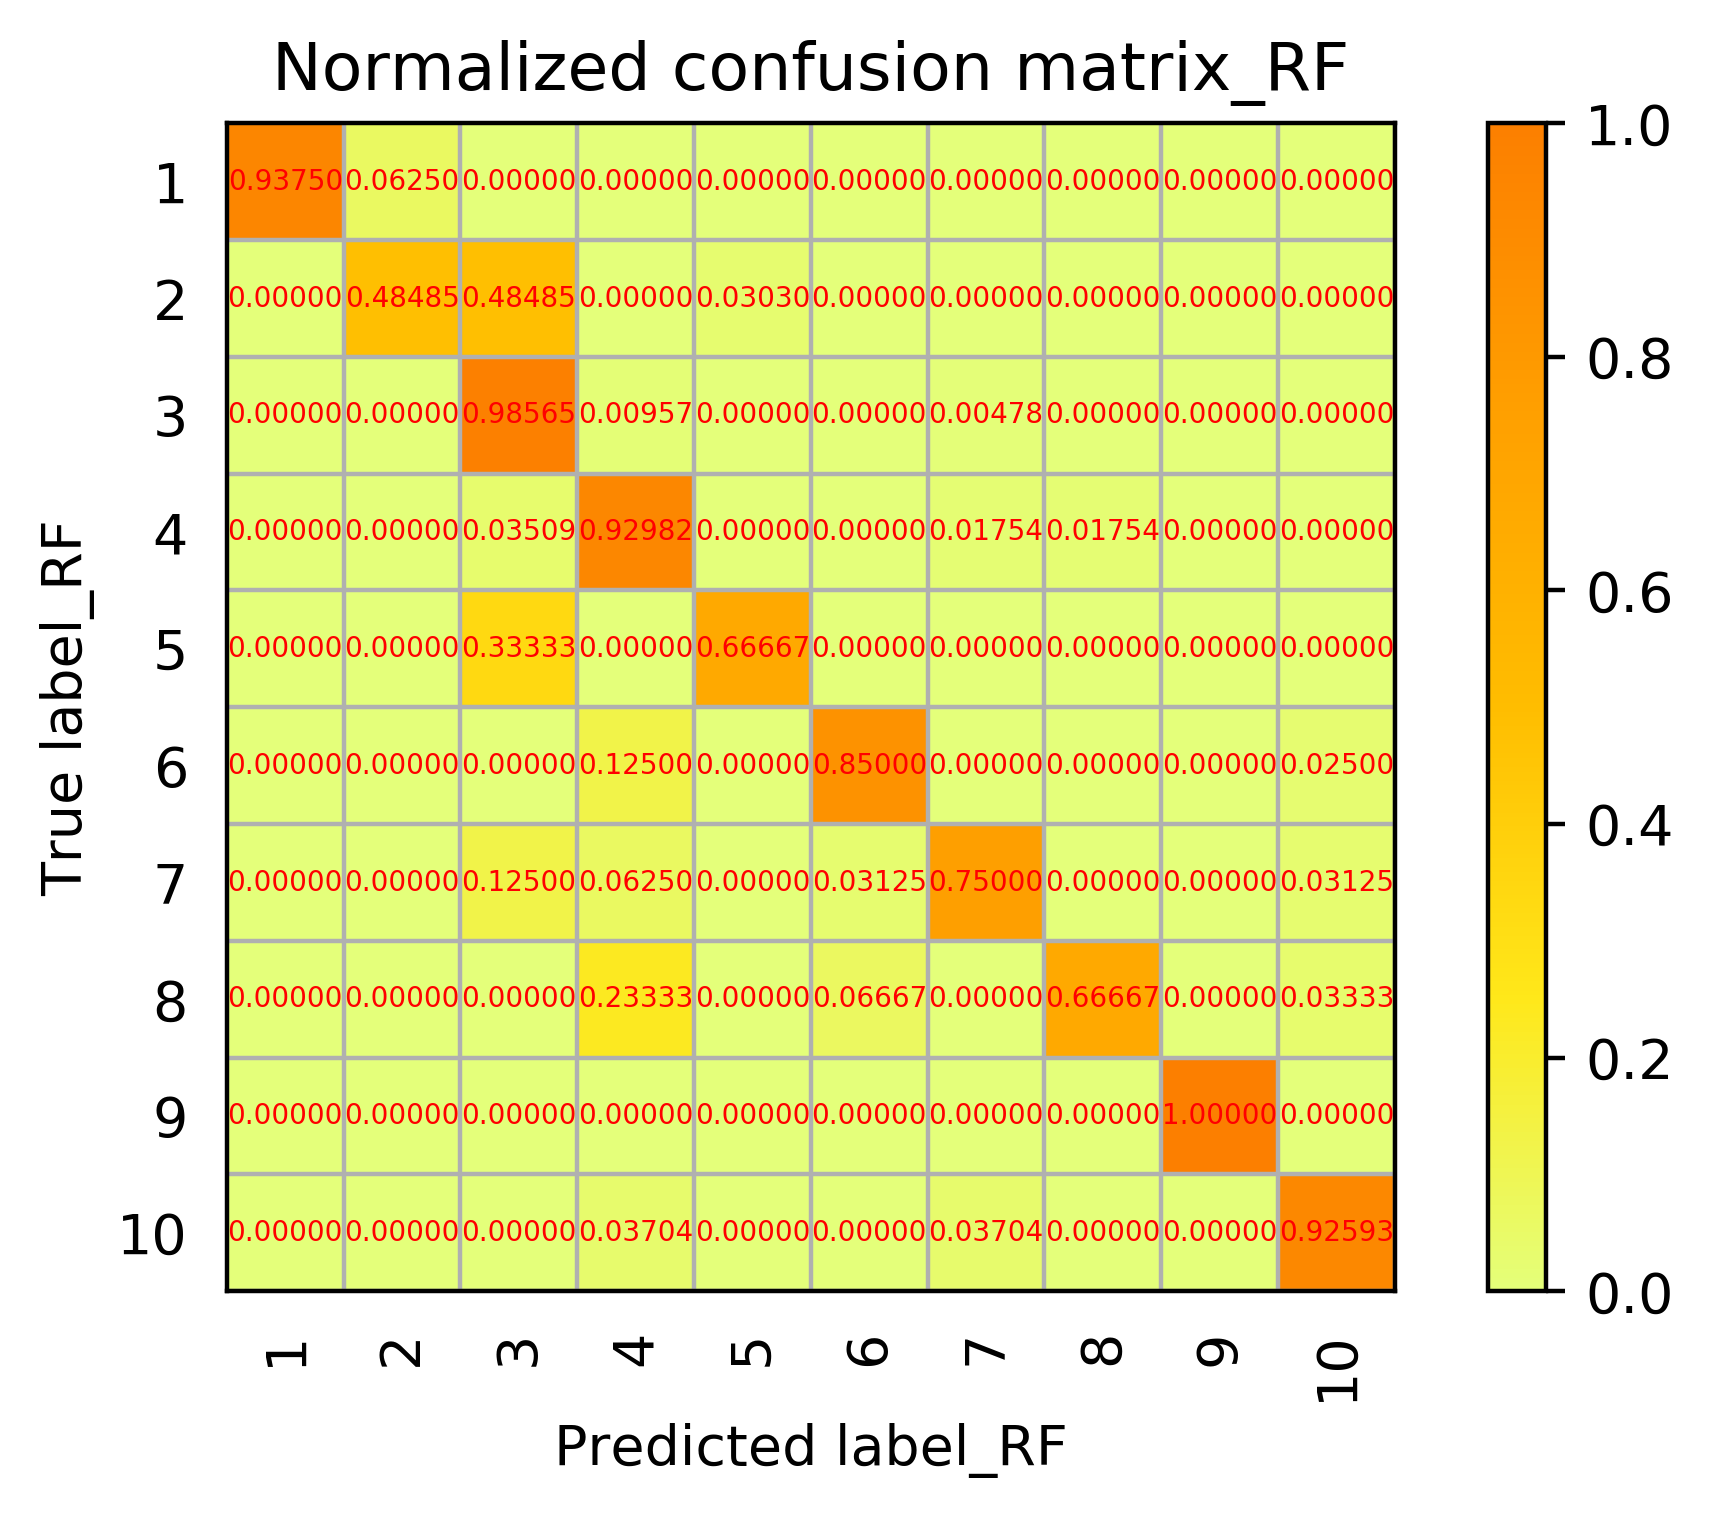

In [50]:


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
labels = ['1', '2', '3','4','5','6','7','8','9','10']
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label_RF')
    plt.xlabel('Predicted label_RF')
cm = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=3)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
plt.figure(figsize=(6, 4), dpi=400)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c >= 0.0:
        plt.text(x_val, y_val, "%0.5f" % (c,), color='red', fontsize=5, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix_RF')
# show confusion matrix
plt.savefig('../Data/confusion_matrix_RF.png', format='png')
plt.show()